In [ ]:
locals()

## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

In [1]:
from sklearn.datasets import load_boston


In [2]:
data = load_boston()
X, y = data['data'], data['target']

In [ ]:
len(y)

### note: pay attention to the differences between X[：,5] and X[:5] , one refers to an array(5th column), another is a slice of the matrix(first 5 rows)

In [ ]:
len(X[:,5])

In [ ]:
len(X[:5])

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

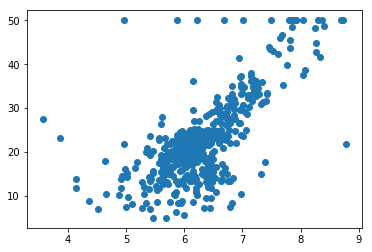

In [4]:
draw_rm_and_price()

In [7]:
import random

In [5]:
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b  

First, try some random number as parameters k and b.

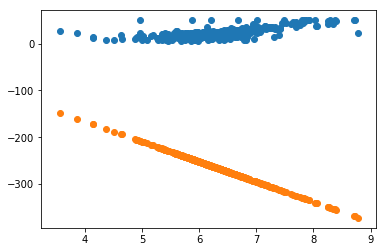

In [8]:

X_rm = X[:, 5] # number of rooms 
k = random.randint(-100, 100) 
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

## loss functions 

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})^2}$$

$$ loss = \frac{1}{n} \sum{ (\mid y_i - \hat{y_i} \mid) }$$

In [9]:
def loss(y, y_hat): # to evaluate the performance 
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [10]:
def loss_abs(y,y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat)))

In [ ]:
data['feature_names']
#data['DESCR']

### whenever a new loss is smaller than the current best, adjust the next parameters on a random direction. 

In [ ]:
trying_times =8000

min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1, -1),  # first element: k's change direction, second element: b's change direction
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
]

next_direction = random.choice(direction)

scalar = 0.1

for i in range(trying_times):
    
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]

    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
    else:
        next_direction = random.choice(direction)
    if i%200==0: print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

In [ ]:
i

### gradient descent 

In [11]:
def update_weights(X, y, k, b, learning_rate):
  #  weight_deriv = 0
    k_deriv=0
   # bias_deriv = 0
    b_deriv=0
    N = len(X)
    
    #learning rate 
  

    for i in range(N):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        k_deriv += -2*X[i] * (y[i] - (k*X[i] + b))
        #print('k_deriv',k_deriv)

        # -2(y - (mx + b))
        b_deriv+= -2*(y[i] - (k*X[i] + b))
        #print('b_deriv',b_deriv)

    # We subtract because the derivatives point in direction of steepest ascent
    k -= (k_deriv / N) * learning_rate
    b -= (b_deriv / N) * learning_rate

    return k, b

In [12]:
update_weights(X_rm, y,10.054955982213443, -4.06270750988142, 0.3)

(-128.22299537223032, -26.020432486962402)

In [18]:
import numpy as np
cost_history = []
loss_history = [] 
iters=100000
alpha=0.001
X_rm = X[:, 5] # number of rooms 
N=len(X_rm)
theta=11,80
for i in range(iters):
    #print(current_k)
    price_by_k_and_b = [price(r, theta[0], theta[1]) for r in X_rm]
    #current_loss_array = price_by_k_and_b - y
    current_loss=loss(y,price_by_k_and_b)
    theta=update_weights(X_rm,y,theta[0],theta[1],alpha)
    #update_weights(X, y, k, b, learning_rate):
    # Log Progress
    if i % 500 == 0:
        print(theta)
        print(current_loss)
            #print("iter={:d}    weight={:.2f}    bias={:.4f}    cost={:.2}".format(i, current_k, current_b, current_loss))

(9.406883386889328, 79.74680365612649)
16072.472372899198
(-8.23403620106536, 75.60664456076765)
193.44142274423274
(-8.026838733413877, 74.28863701772977)
189.8811020819332
(-7.82211764042063, 72.98638198612912)
186.4053770518937
(-7.619843325047028, 71.69969119571041)
183.01223760454948
(-7.4199865439912385, 70.42837862637982)
179.6997214504764
(-7.22251840346035, 69.17226048131083)
176.46591292557707
(-7.027410354993209, 67.931155160373)
173.30894188323091
(-6.834634191332931, 66.70488323387661)
170.22698261276852
(-6.644162042349147, 65.49326741663346)
167.21825278364417
(-6.455966371008646, 64.29613254232564)
164.28101241469452
(-6.270019969394183, 63.11330553818073)
161.41356286788684
(-6.08629595477108, 61.94461539995104)
158.61424586598042
(-5.904767765700673, 60.789893167190726)
155.88144253352493
(-5.725409158200317, 59.64897189882912)
153.21357246064989
(-5.5481942019491095, 58.52168664903494)
150.6090927890922
(-5.37309727653921, 57.407874443370474)
148.06649731994855
(-5.2

## change it to use absolute value loss function